In [64]:
# Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns

In [65]:
# CSV-Datei mit Semikolon als Trennzeichen lesen
df = pd.read_csv('data.csv', sep=';')
df.rename(columns=lambda x: re.sub(r'\W+', ' ', x).strip(), inplace=True)
# Die ersten fünf Zeilen anzeigen
df.head()
df.shape

(4424, 37)

In [66]:

# Überprüfen, welche Werte NaN sind (True = NaN, False = kein NaN)
print(df.isna().sum().sum())

0


In [67]:
# Spaltennamen bereinigen
cleaned_columns = [
    "marital_status",
    "application_mode",
    "application_order",
    "course",
    "daytime_evening_attendance",
    "previous_qualification",
    "previous_qualification_grade",
    "nationality",          # Korrektur von "Nacionality"
    "mothers_qualification", # Apostroph und Leerzeichen entfernt
    "fathers_qualification", # Apostroph und Leerzeichen entfernt
    "mothers_occupation",
    "fathers_occupation",
    "admission_grade",
    "displaced",
    "educational_special_needs",
    "debtor",
    "tuition_fees_up_to_date",
    "gender",
    "scholarship_holder",
    "age_at_enrollment",
    "international",
    "curricular_units_1st_sem_credited",
    "curricular_units_1st_sem_enrolled",
    "curricular_units_1st_sem_evaluations",
    "curricular_units_1st_sem_approved",
    "curricular_units_1st_sem_grade",
    "curricular_units_1st_sem_without_evaluations",
    "curricular_units_2nd_sem_credited",
    "curricular_units_2nd_sem_enrolled",
    "curricular_units_2nd_sem_evaluations",
    "curricular_units_2nd_sem_approved",
    "curricular_units_2nd_sem_grade",
    "curricular_units_2nd_sem_without_evaluations",
    "unemployment_rate",
    "inflation_rate",
    "gdp",
    "target"
]

# Spalten umbenennen
df.columns = cleaned_columns

In [68]:
# Überprüfung aller fehlenden Werte in einem Befehl
missing_values = df.isnull() | df.eq('') | df.eq('None') | df.eq('null') | df.eq('?') | df.eq('-') | df.eq('N/A') | df.eq('unknown')
# Anzahl der fehlenden Werte pro Spalte
missing_values.sum()
# Summe aller fehlenden Werte im gesamten DataFrame
missing_values.sum().sum()
# Zeige alle Zeilen, die mindestens einen fehlenden Wert haben
print(df[missing_values.any(axis=1)])

Empty DataFrame
Columns: [marital_status, application_mode, application_order, course, daytime_evening_attendance, previous_qualification, previous_qualification_grade, nationality, mothers_qualification, fathers_qualification, mothers_occupation, fathers_occupation, admission_grade, displaced, educational_special_needs, debtor, tuition_fees_up_to_date, gender, scholarship_holder, age_at_enrollment, international, curricular_units_1st_sem_credited, curricular_units_1st_sem_enrolled, curricular_units_1st_sem_evaluations, curricular_units_1st_sem_approved, curricular_units_1st_sem_grade, curricular_units_1st_sem_without_evaluations, curricular_units_2nd_sem_credited, curricular_units_2nd_sem_enrolled, curricular_units_2nd_sem_evaluations, curricular_units_2nd_sem_approved, curricular_units_2nd_sem_grade, curricular_units_2nd_sem_without_evaluations, unemployment_rate, inflation_rate, gdp, target]
Index: []

[0 rows x 37 columns]


In [69]:
df.head()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nationality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [70]:
#print(df.columns)
#print(df.dtypes)
print(df.dtypes.value_counts())
print(df.dtypes.unique())
for spalte in df.columns:
    if df.dtypes[spalte]=='object':

        print('spalte ist :', spalte)
object_spalten = df.select_dtypes(include='object').columns
print(object_spalten)
print(df.loc[:,'target'])
print(df['target'].unique())
df['target'] = df['target'].astype('category')
#
dezimal_liste=[]
for spalte in df.columns:
    if df.dtypes[spalte]=='float64':
        #print('spalte ist Dezimal:', spalte)
        dezimal_liste.append(spalte)
print(dezimal_liste)
# Schleife, um die angegebenen Spalten in 'int64' umzuwandeln
#umwandeln_Liste = ['Age at enrollment', 'Curricular units 1st sem grade', 'Curricular units 2nd sem credited']
umwandeln_liste = [
    'age_at_enrollment',                 # Vorher: 'Age at enrollment'
    'curricular_units_1st_sem_grade',    # Vorher: 'Curricular units 1st sem grade'
    'curricular_units_2nd_sem_credited'  # Vorher: 'Curricular units 2nd sem credited'
]


for spalte in umwandeln_liste:
    if spalte in df.columns:  # Überprüfen, ob die Spalte im DataFrame existiert
        df[spalte] = df[spalte].astype('int64')

# Die Datentypen der umgewandelten Spalten anzeigen
print(df[umwandeln_liste].dtypes)
###################################################################################################################################################
print(df.describe())

int64      29
float64     7
object      1
Name: count, dtype: int64
[dtype('int64') dtype('float64') dtype('O')]
spalte ist : target
Index(['target'], dtype='object')
0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: target, Length: 4424, dtype: object
['Dropout' 'Graduate' 'Enrolled']
['previous_qualification_grade', 'admission_grade', 'curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_grade', 'unemployment_rate', 'inflation_rate', 'gdp']
age_at_enrollment                    int64
curricular_units_1st_sem_grade       int64
curricular_units_2nd_sem_credited    int64
dtype: object
       marital_status  application_mode  application_order       course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484

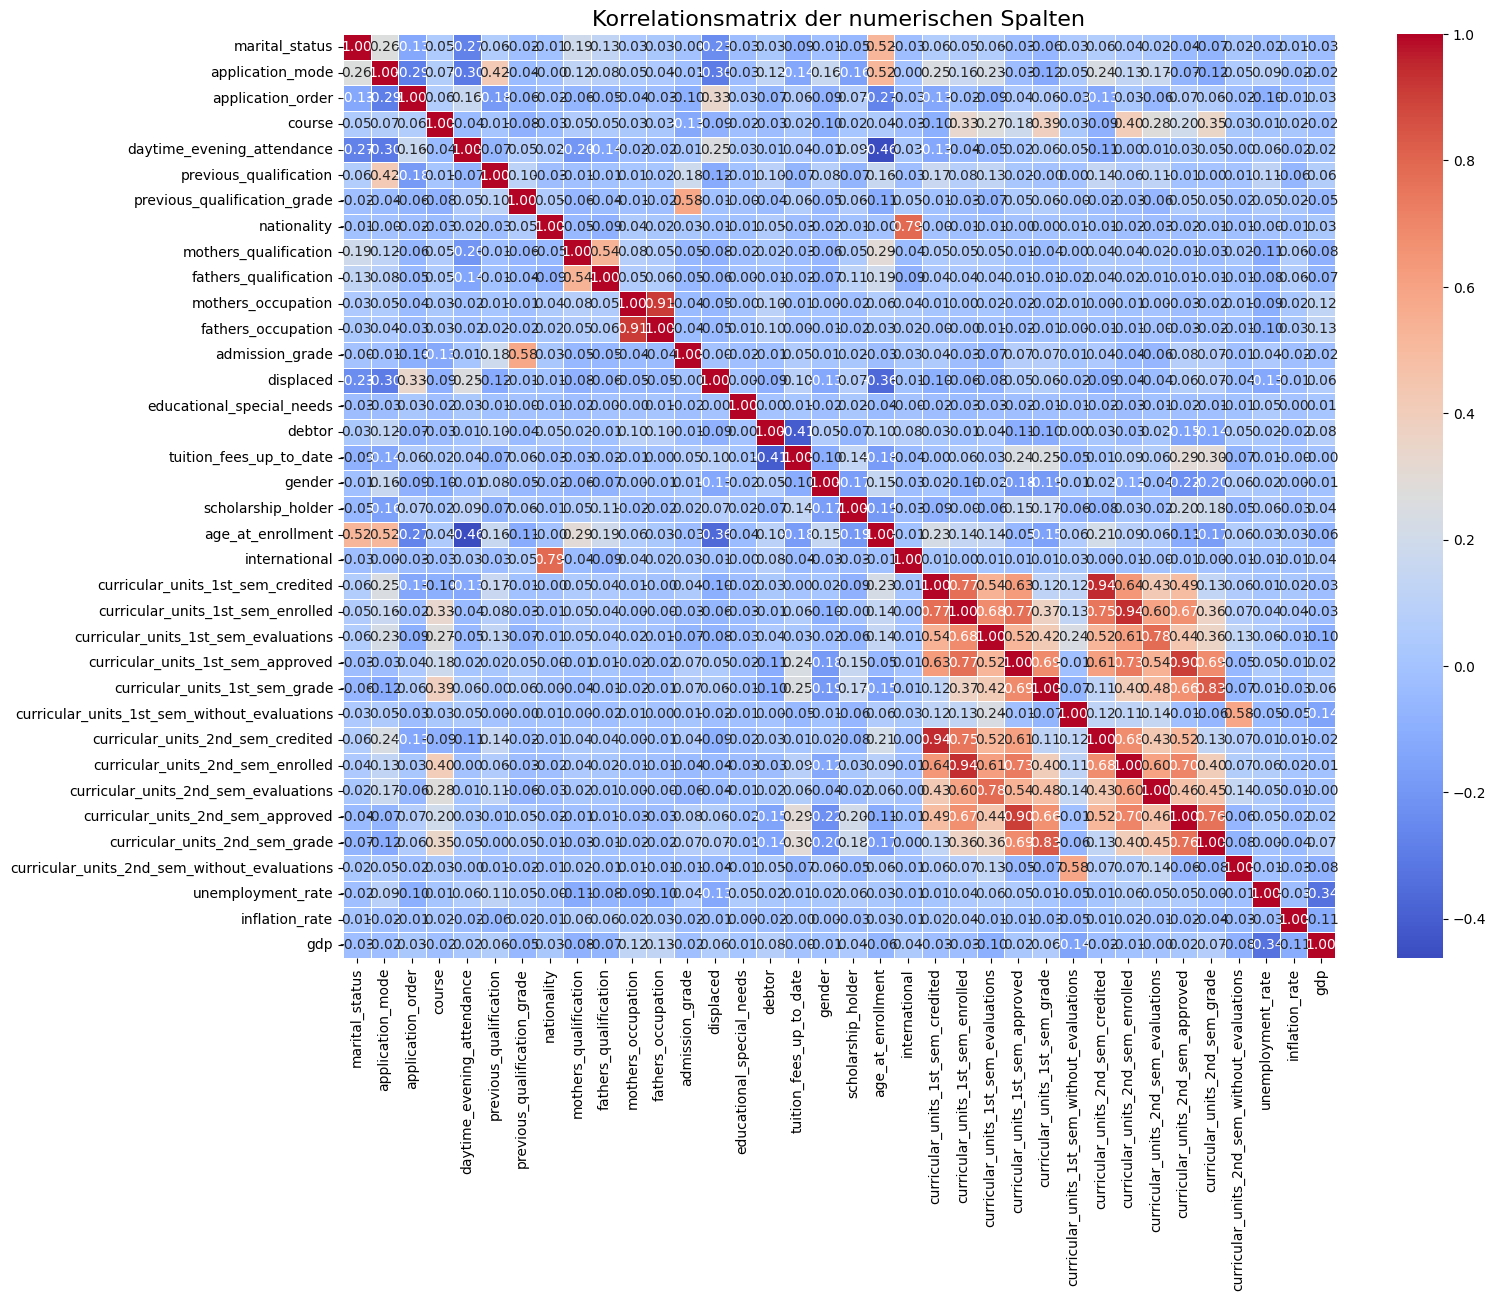

In [71]:
###############################################################################################################################################################
#Korrelation
# Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------- KORRELATIONSMATRIX VISUALISIEREN ----------------------------

# 1. Nur numerische Spalten auswählen
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()

# 2. Spalten mit Standardabweichung = 0 entfernen
df_numeric = df_numeric.loc[:, df_numeric.std(numeric_only=True) != 0]

# 3. Fehlende Werte mit dem Median auffüllen 
df_numeric = df_numeric.fillna(df_numeric.median())

# 4. Korrelationsmatrix berechnen
correlation_matrix = df_numeric.corr()

# 5. Heatmap visualisieren
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix der numerischen Spalten', fontsize=16)
plt.show()

## ---------------------------- STARKE KORRELATIONEN HERAUSFILTERN ----------------------------

## Schwellenwert für starke Korrelationen festlegen
#threshold = 0.8

## 1. Starke Korrelationen finden (ohne Diagonale)
#starke_korrelationen = [
    #(spalte1, spalte2, correlation_matrix.loc[spalte1, spalte2])
    #for spalte1 in correlation_matrix.columns
    #for spalte2 in correlation_matrix.columns
    #if spalte1 != spalte2 and abs(correlation_matrix.loc[spalte1, spalte2]) >= threshold
#]

## 2. Starke Korrelationen ausgeben (vereinfacht)
#print("\nStarke Korrelationen:" if starke_korrelationen else "\nKeine gefunden.")
#for spalte1, spalte2, corr in starke_korrelationen:
    #print(spalte1, spalte2, round(corr, 2))

## 3. Stark korrelierte Spalten löschen (jeweils die zweite aus jedem Paar)
#columns_to_drop = []
#for spalte1, spalte2, corr in starke_korrelationen:
    #if spalte2 not in columns_to_drop:
        #columns_to_drop.append(spalte2)  # Zweite Spalte wird gelöscht

## 4. Stark korrelierte Spalten entfernen
#df_numeric.drop(columns=columns_to_drop, inplace=True, errors='ignore')

## 5. Gelöschte Spalten anzeigen
#if columns_to_drop:
    #print("\nGelöschte Spalten:")
    #print(*sorted(columns_to_drop))

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nationality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_wit

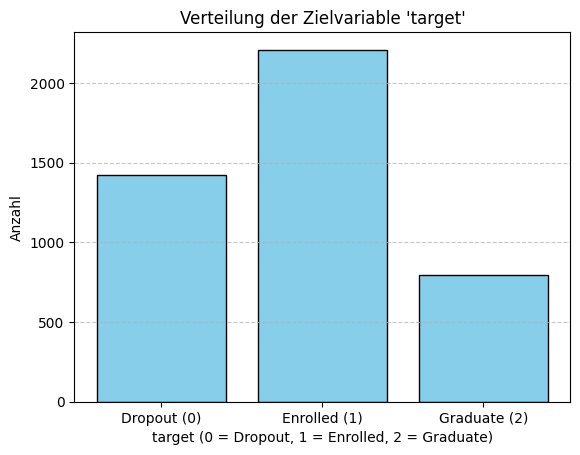

In [72]:

#######################################Zielvariable 'Target' analysieren###########################################
print(df.columns)
print(df['target'].isna().sum())
print(df['target'].unique())
#
# Prozentuale Verteilung anzeigen
print("\nVerteilung der Zielvariable 'target':")
print(df['target'].value_counts(normalize=True))  

# Histogramm plotten
plt.hist(df['target'].dropna(), bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8, 
         color='skyblue', edgecolor='black')  
plt.title("Verteilung der Zielvariable 'target'")
plt.xlabel("target (0 = Dropout, 1 = Enrolled, 2 = Graduate)")
plt.ylabel("Anzahl")
plt.xticks([0, 1, 2], labels=["Dropout (0)", "Enrolled (1)", "Graduate (2)"])
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()
###############################################################################################################

In [73]:
# Zielvariable „Dropout“ in Binärspalte umwandeln
df['dropout'] = df['target'].apply(lambda x: 1 if x == 'Dropout' else 0)
df['dropout'].head()


0    1
1    0
2    1
3    0
4    0
Name: dropout, dtype: int64

In [74]:
# Auskommentiert, da strings in LogRegression nicht akzeptiert werden
# Sonstige Berufe sind auffällig
# Berufe der Eltern gruppieren - Bei Bedarf gerne überprüfen und anpassen
# def group_occupation(code):
#     if code in [1, 2, 112, 114, 121, 122, 123, 124, 125, 101, 102, 103]:  
#         return "Hochqualifiziert" # Führungskräfte, Akademiker etc
#     elif code in [3, 4, 131, 132, 134, 135, 141, 143, 144, 125, 135]:
#         return "Mittelqualifiziert" # Technisch, Verwaltung, Gesundheitsberufe, Büro
#     elif code in [5, 6, 7, 8, 152, 153, 154, 161, 163, 171, 172, 173, 174, 175, 181, 182, 183, 192, 193, 194, 195]:
#         return "Handwerk & manuelle Berufe" # Verkauf, Bau, Handwerk, Landwirtschaft, etc. 
#     elif code in [9, 191, 192, 193, 194, 195]:
#         return "Einfache Tätigkeiten" # Ungelernte Arbeiter, Hilfskräfte, etc.
#     elif code in [0, 10, 90, 99, 101, 102, 103]: # Sonstige
#         return "Sonstige"
#     else:
#         return "Sonstige"

# # Neue Spalten mit gruppierten Berufen:
# df['father_occ_group'] = df["fathers_occupation"].apply(group_occupation)
# df['mother_occ_group'] = df["mothers_occupation"].apply(group_occupation)



In [75]:
# NICHT AUSFÜHREN!
# 1) Dropout-Rate nach Berufsgruppe des Vaters
# plt.figure(figsize=(8,4))
# sns.barplot(
#     data=df, 
#     x='father_occ_group', 
#     y='dropout', 
#     estimator=lambda x: sum(x)/len(x),  # Anteil Dropout (durchschnitt der Binärvariable)
#     errorbar='se',                     # Standardfehler als Fehlerbalken
#     order=['Hochqualifiziert','Mittelqualifiziert',
#            'Handwerk & manuelle Berufe','Einfache Tätigkeiten','Sonstige']
# )
# plt.ylim(0, 1)
# plt.xlabel('Berufsgruppe Vater')
# plt.ylabel('Dropout-Rate')
# plt.title('Dropout-Rate nach Berufsgruppe des Vaters')
# plt.xticks(rotation=25, ha='right')
# plt.tight_layout()
# plt.show()

# # 2) Dropout-Rate nach Berufsgruppe der Mutter
# plt.figure(figsize=(8,4))
# sns.barplot(
#     data=df, 
#     x='mother_occ_group', 
#     y='dropout', 
#     estimator=lambda x: sum(x)/len(x),
#     errorbar='se',
#     order=['Hochqualifiziert','Mittelqualifiziert',
#            'Handwerk & manuelle Berufe','Einfache Tätigkeiten','Sonstige']
# )
# plt.ylim(0, 1)
# plt.xlabel('Berufsgruppe Mutter')
# plt.ylabel('Dropout-Rate')
# plt.title('Dropout-Rate nach Berufsgruppe der Mutter')
# plt.xticks(rotation=25, ha='right')
# plt.tight_layout()
# plt.show()


In [76]:
# # Auskommentiert, da strings in LogRegression nicht akzeptiert werden
# Sonstige Qualifikationen sind auffällig
# Bildungsniveau der Eltern gruppieren
# education_groups = {
#     "Grundbildung": [9, 10, 11, 12, 14, 15, 19, 26, 27, 29, 30, 37, 38],
#     "Mittlere Bildung": [1, 18, 22, 39, 42],
#     "Hochschulabschluss": [2, 3, 4, 5, 40, 43, 44],
#     "Unbekannt": [34, 35, 36]
# }

# def map_education(code):
#     for group, codes in education_groups.items():
#         if code in codes:
#             return group
#     return "Unbekannt"

# df["mothers_qualification_group"] = df["mothers_qualification"].apply(map_education)
# df["fathers_qualification_group"] = df["fathers_qualification"].apply(map_education)

In [77]:
# 1) Dropout-Rate nach Bildungsniveau des Vaters
# plt.figure(figsize=(8,4))
# sns.barplot(
#     data=df,
#     x='fathers_qualification_group', 
#     y='dropout',
#     estimator=lambda x: sum(x)/len(x),
#     errorbar='se',
#     order=["Hochschulabschluss", "Mittlere Bildung", "Grundbildung", "Unbekannt"]
# )
# plt.ylim(0, 1)
# plt.xlabel('Bildungsniveau Vater')
# plt.ylabel('Dropout-Rate')
# plt.title('Dropout-Rate nach Bildungsniveau des Vaters')
# plt.xticks(rotation=25, ha='right')
# plt.tight_layout()
# plt.show()

# # 2) Dropout-Rate nach Bildungsniveau der Mutter
# plt.figure(figsize=(8,4))
# sns.barplot(
#     data=df,
#     x='mothers_qualification_group', 
#     y='dropout',
#     estimator=lambda x: sum(x)/len(x),
#     errorbar='se',
#     order=["Hochschulabschluss", "Mittlere Bildung", "Grundbildung", "Unbekannt"]
# )
# plt.ylim(0, 1)
# plt.xlabel('Bildungsniveau Mutter')
# plt.ylabel('Dropout-Rate')
# plt.title('Dropout-Rate nach Bildungsniveau der Mutter')
# plt.xticks(rotation=25, ha='right')
# plt.tight_layout()
# plt.show()

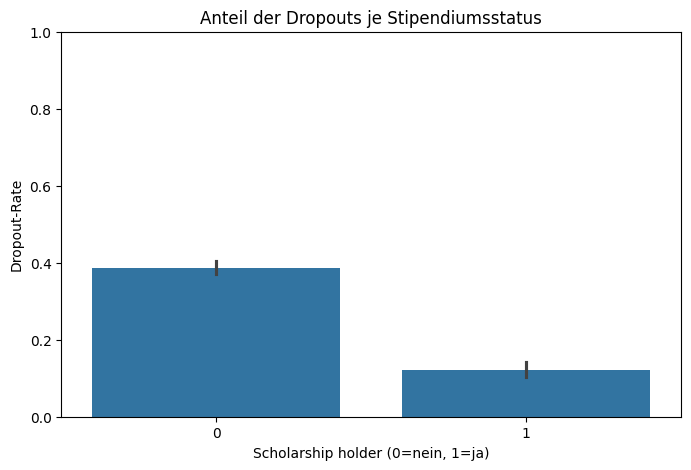

In [78]:
# Beispiel: Scholarship vs. Dropout
# Dropout ohne Stidiendium höher
plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x='scholarship_holder',      # 0 = kein Stipendium, 1 = Stipendium
    y='dropout',
    estimator=lambda x: sum(x)/len(x)  # Anteil (üblicherweise ist das default => mean)
)
plt.title('Anteil der Dropouts je Stipendiumsstatus')
plt.ylim(0, 1)
plt.ylabel('Dropout-Rate')
plt.xlabel('Scholarship holder (0=nein, 1=ja)')
plt.show()


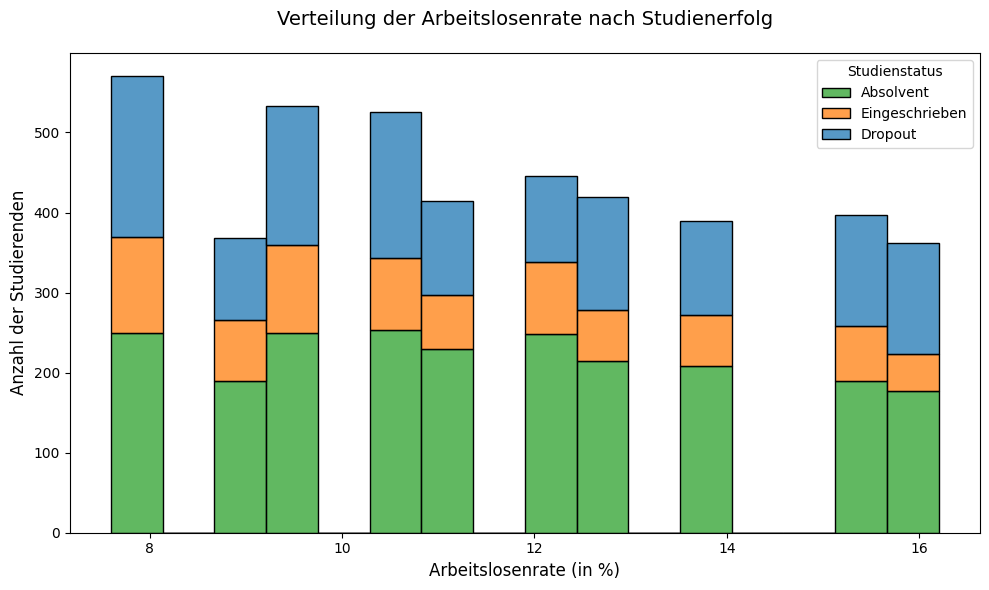

In [79]:
# Hohe Arbeitslosenrate korreliert mit niedrigem Dropout

plt.figure(figsize=(10, 6))
sns.histplot(x='unemployment_rate',data=df,hue='target',multiple='stack')

plt.title("Verteilung der Arbeitslosenrate nach Studienerfolg", fontsize=14, pad=20)
plt.xlabel("Arbeitslosenrate (in %)", fontsize=12)
plt.ylabel("Anzahl der Studierenden", fontsize=12)
plt.legend(title="Studienstatus",labels=["Absolvent", "Eingeschrieben", "Dropout"], )


plt.tight_layout()
plt.show()

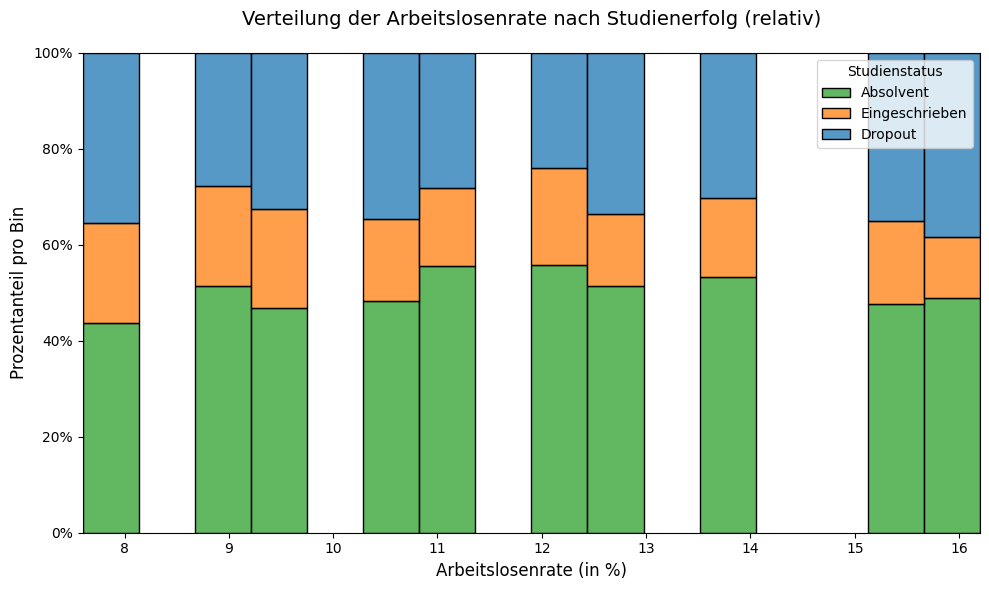

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df, 
    x='unemployment_rate', 
    hue='target',
    multiple='fill',    
    stat='probability'   
)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # skaliert 0..1 in 0..100%
plt.title("Verteilung der Arbeitslosenrate nach Studienerfolg (relativ)", fontsize=14, pad=20)
plt.xlabel("Arbeitslosenrate (in %)", fontsize=12)
plt.ylabel("Prozentanteil pro Bin", fontsize=12)
plt.legend(title="Studienstatus", labels=["Absolvent", "Eingeschrieben", "Dropout"])

plt.tight_layout()
plt.show()


In [81]:
from sklearn.model_selection import train_test_split

# Zielvariable und Features definieren
X = df.drop(columns=['target'])
y = df.loc[:,'target']

# Daten in Trainings- und Testdatensätze aufteilen
# Kemal: Test von 0.1 auf 0.2 geändert
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
###########################################################################################################

# 4. Testdaten speichern
features_test = pd.concat([X_test, y_test], axis=1)  # Test-Features mit Zielvariable zusammenfügen
features_test.to_csv('features_test.csv', index=False)  # CSV-Datei speichern
#
print("Testdaten wurden erfolgreich als 'features_test.csv' gespeichert.")
###########################################################################################################


# Numerische und Kategorische Spalten identifizieren
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

print("Numerische Spalten:", numeric_columns)
print("Kategorische Spalten:", categorical_columns)
#################################################################################################
# Kopien von X_train und X_test erstellen, um Slices zu vermeiden
X_train = X_train.copy()
X_test = X_test.copy()
#################################################################################################
# Kategorische Spalten in 'category' umwandeln
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


Testdaten wurden erfolgreich als 'features_test.csv' gespeichert.
Numerische Spalten: Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nationality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd

In [85]:
# Median für numerische Spalten berechnen
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
median_train = dict(X_train[numeric_columns].median())

#print("Median für numerische Spalten:", median_train)
#################################################################################################################
# 2. Modus für kategorische Spalten berechnen und anpassen
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
mode = X_train[categorical_columns].mode().to_dict()

# Modus-Dictionary anpassen
mode_train = {}
for category, inner_dict in mode.items():
    for key, value in inner_dict.items():
        mode_train[category] = value

#print("Modus für kategorische Spalten:", mode_train)
###################################################################################################################
# 3. Fehlende Werte ersetzen (Numerisch: Median, Kategorisch: Modus)
for col in numeric_columns:
    X_train[col] = X_train[col].fillna(median_train[col])
    X_test[col] = X_test[col].fillna(median_train[col])

for col in categorical_columns:
    X_train[col] = X_train[col].fillna(mode_train[col])
    X_test[col] = X_test[col].fillna(mode_train[col])

/Users/kemdo/Documents/Portfolio_Projekt/students/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


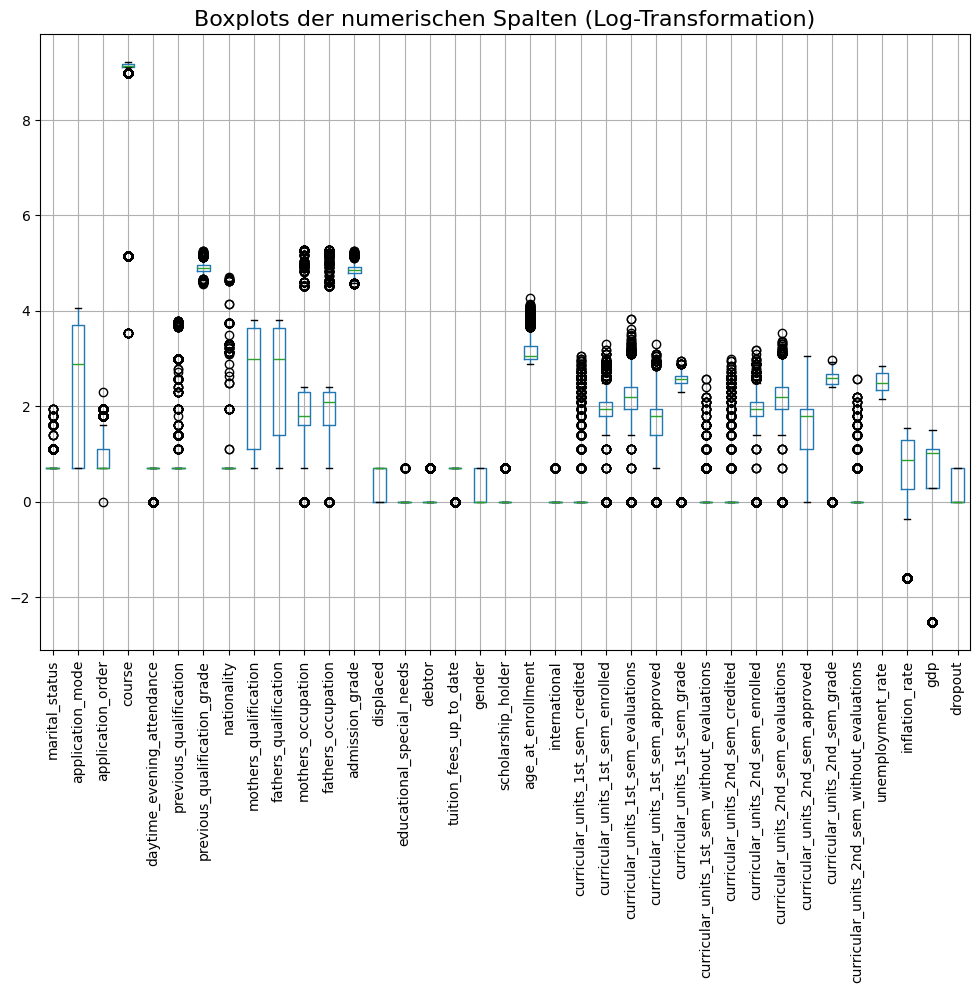

/Users/kemdo/Documents/Portfolio_Projekt/students/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)



--- Ausreißeranalyse ---
MAD ist für Spalte marital_status 0. Ausreißeranalyse wird übersprungen.
Spalte application_mode: 0 Ausreißer gefunden.
MAD ist für Spalte application_order 0. Ausreißeranalyse wird übersprungen.
Spalte course: 0 Ausreißer gefunden.
MAD ist für Spalte daytime_evening_attendance 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte previous_qualification 0. Ausreißeranalyse wird übersprungen.
Spalte previous_qualification_grade: 0 Ausreißer gefunden.
MAD ist für Spalte nationality 0. Ausreißeranalyse wird übersprungen.
Spalte mothers_qualification: 0 Ausreißer gefunden.
Spalte fathers_qualification: 0 Ausreißer gefunden.
Spalte mothers_occupation: 0 Ausreißer gefunden.
Spalte fathers_occupation: 0 Ausreißer gefunden.
Spalte admission_grade: 0 Ausreißer gefunden.
MAD ist für Spalte displaced 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte educational_special_needs 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte debtor 0. Ausreißeranalyse 

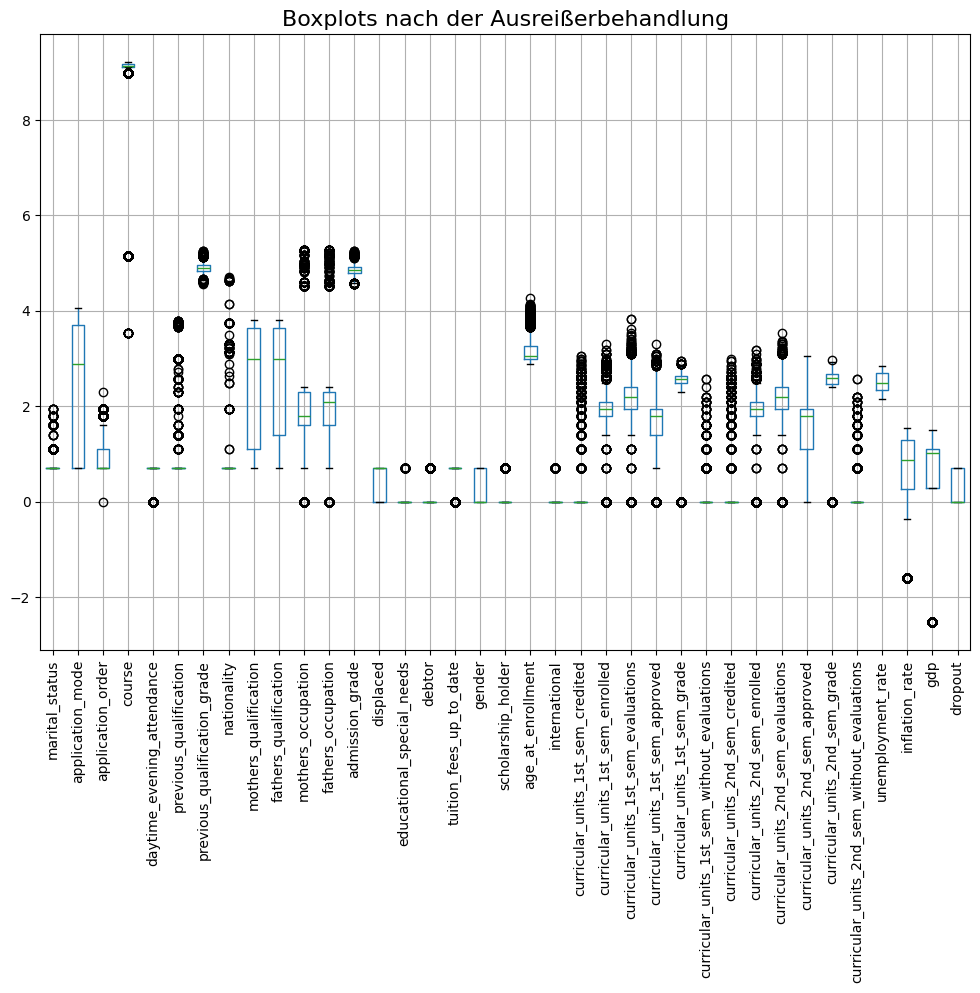

In [86]:
######Deal with Outliers############################################################################################################
import numpy as np
import pandas as pd
from statsmodels import robust
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)  # log1p = log(x+1) vermeidet log(0)
plt.title('Boxplots der numerischen Spalten (Log-Transformation)', fontsize=16)
plt.show()
#
#Ausreißer


def handle_outliers(data, numeric_columns, threshold=15):
    """
    Behandelt Ausreißer in den numerischen Spalten eines DataFrames.
    
    Args:
        df (pd.DataFrame): Der zu verarbeitende DataFrame.
        numeric_columns (list): Liste der numerischen Spalten.
        threshold (int): Schwellenwert für die MAD (Median Absolute Deviation).
        
    Returns:
        pd.DataFrame: Der DataFrame mit behandelten Ausreißern.
    """
    outlier_indices = set()  # Speichert die Indizes der Ausreißer
    print("\n--- Ausreißeranalyse ---")
    
    for col in numeric_columns:
        median = data[col].median()
        mad = robust.mad(data[col])
        
        if mad == 0:  # Wenn MAD 0 ist, überspringen
            print(f"MAD ist für Spalte {col} 0. Ausreißeranalyse wird übersprungen.")
            continue
        
        lower_bound = median - threshold * mad
        upper_bound = median + threshold * mad
        
        # Ausreißer identifizieren
        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Spalte {col}: {len(col_outliers)} Ausreißer gefunden.")
        
        # Ausreißer durch Median ersetzen
        data.loc[col_outliers.index, col] = median
        outlier_indices.update(col_outliers.index)
    
    # Statistik über Ausreißer
    total_outliers = len(outlier_indices)
    percentage_outliers = (total_outliers / len(data)) * 100
    print(f"\nGesamtanzahl der eindeutigen Ausreißer: {total_outliers}")
    print(f"Prozentsatz der Ausreißer: {percentage_outliers:.2f}%")
    
    return data
#
# Numerische Spalten identifizieren
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Ausreißer in X_train behandeln
X_train = handle_outliers(X_train, numeric_columns)
print("Ausreißer in X_train wurden behandelt.")
#
plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)
plt.title('Boxplots nach der Ausreißerbehandlung', fontsize=16)
plt.show()
###############################################################################################################################################



In [91]:
X_train = X_train.drop('dropout', axis=1)
X_test = X_test.drop('dropout', axis=1)

KeyError: "['dropout'] not found in axis"

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7220338983050848


              precision    recall  f1-score   support

     Dropout       0.82      0.70      0.76       316
    Enrolled       0.38      0.30      0.34       151
    Graduate       0.75      0.89      0.81       418

    accuracy                           0.72       885
   macro avg       0.65      0.63      0.64       885
weighted avg       0.71      0.72      0.71       885



[[222  40  54]
 [ 34  45  72]
 [ 14  32 372]]


/Users/kemdo/Documents/Portfolio_Projekt/students/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier(n_estimators=100)
random_f.fit(X_train, y_train)
predictions = random_f.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7581920903954802


              precision    recall  f1-score   support

     Dropout       0.82      0.76      0.79       316
    Enrolled       0.52      0.32      0.40       151
    Graduate       0.77      0.91      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.74      0.76      0.74       885



[[240  25  51]
 [ 37  49  65]
 [ 15  21 382]]


In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipeline
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='accuracy',         
    verbose=1, 
    cv=5,                
    n_jobs=-1             
)

grid_search.fit(X_train, y_train)

print("Beste Parameter:", grid_search.best_params_)
print("Bestes CV-Ergebnis (mean test score):", grid_search.best_score_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Beste Parameter: {'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Bestes CV-Ergebnis (mean test score): 0.776494138517968
Test Accuracy: 0.7661016949152543
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       316
    Enrolled       0.51      0.30      0.38       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix:
 [[239  27  50]
 [ 41  46  64]
 [  8  17 393]]


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


best_params = {
    'class_weight': 'balanced',
    'max_depth': 20,
    'min_samples_split': 2,
    'n_estimators': 200
}

random_f = RandomForestClassifier(
    class_weight=best_params['class_weight'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)


random_f.fit(X_train, y_train)
predictions = random_f.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.7649717514124293

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       316
    Enrolled       0.55      0.34      0.42       151
    Graduate       0.77      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885

Confusion Matrix:
 [[237  25  54]
 [ 36  51  64]
 [ 12  17 389]]


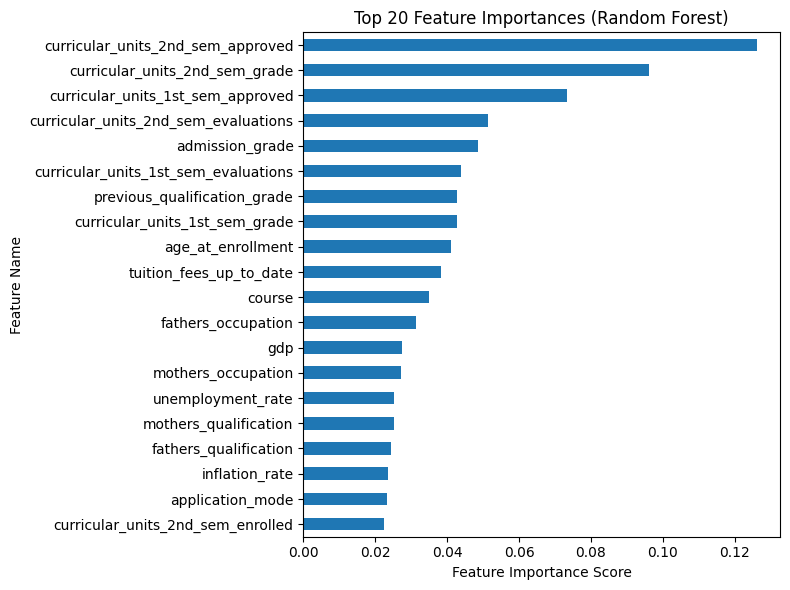

In [96]:
importances = random_f.feature_importances_
feature_names = X_train.columns  


feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 6))
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

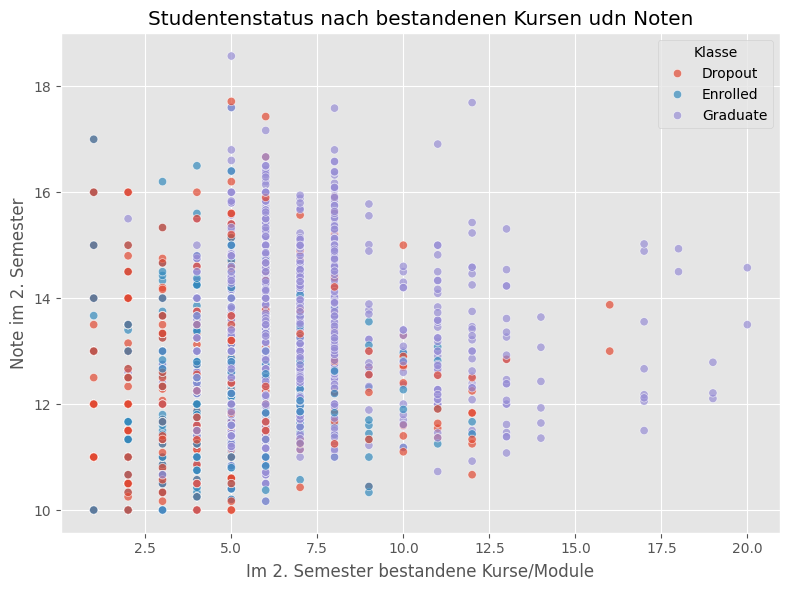

In [145]:


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_no_outlier, 
    x='curricular_units_2nd_sem_approved', 
    y='curricular_units_2nd_sem_grade', 
    #size='curricular_units_2nd_sem_approved',
    #sizes=(20, 200),
    hue='target',        
    alpha=0.7              
)
plt.title("Studentenstatus nach bestandenen Kursen udn Noten")
plt.xlabel("Im 2. Semester bestandene Kurse/Module")
plt.ylabel("Note im 2. Semester")
plt.legend(title="Klasse") 
plt.tight_layout()
plt.show()


Die Grafik zeigt, dass Studierende mit vielen bestandenen Kursen im zweiten Semester häufig auch höhere Durchschnittsnoten erzielen. Im Gegensatz dazu konzentrieren sich viele Dropout-Fälle dort, wo nur wenige Lehrplaneinheiten erfolgreich absolviert wurden und/oder die Noten eher niedrig ausfallen. Studierende, die noch eingeschrieben sind („Enrolled“), liegen meist zwischen diesen beiden Extremen und weisen mittelmäßige Werte bei sowohl bestandenen Kursen als auch Noten auf.

/var/folders/lz/_mnslz4x64340f6qccrnkq9r0000gn/T/ipykernel_1171/574414106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dropout = df_no_outlier[df["target"] == "Dropout"]
/var/folders/lz/_mnslz4x64340f6qccrnkq9r0000gn/T/ipykernel_1171/574414106.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_other   = df_no_outlier[df["target"] != "Dropout"]


Text(0, 0.5, 'Note im 2. Semester')

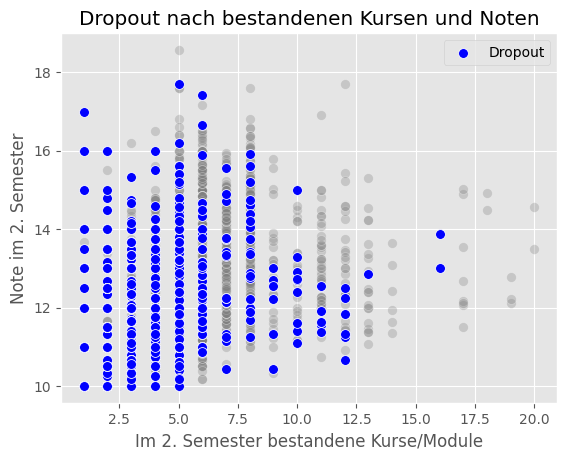

In [ ]:
df_dropout = df_no_outlier[df["target"] == "Dropout"]
df_other   = df_no_outlier[df["target"] != "Dropout"]

sns.scatterplot(data=df_other, x="curricular_units_2nd_sem_approved", y="curricular_units_2nd_sem_grade", alpha=0.3, color="gray", s=50)
sns.scatterplot(data=df_dropout, x="curricular_units_2nd_sem_approved", y="curricular_units_2nd_sem_grade", color="blue", s=50, label="Dropout")

plt.title("Dropout nach bestandenen Kursen und Noten")
plt.xlabel("Im 2. Semester bestandene Kurse/Module")
plt.ylabel("Note im 2. Semester") 

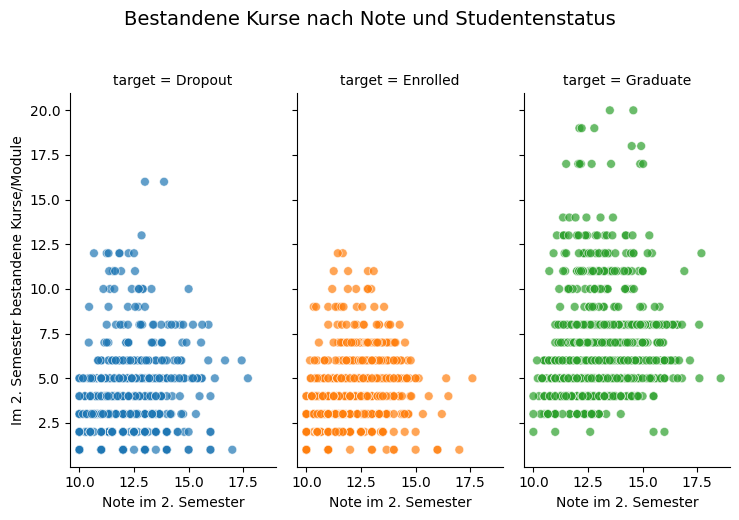

In [ ]:
g = sns.relplot(
    data=df_no_outlier,
    x='curricular_units_2nd_sem_grade',   
    y='curricular_units_2nd_sem_approved',
    col='target',                        
    hue='target',                       
    kind='scatter',
    alpha=0.7,                            
    s=40,                                 
    height=5,                            
    aspect=0.5,
    legend=None                             
)
g.set_axis_labels("Note im 2. Semester", "Im 2. Semester bestandene Kurse/Module")
g.fig.suptitle("Bestandene Kurse nach Note und Studentenstatus", y=1.03, fontsize=14)

plt.tight_layout()
plt.show()



Klassen-Mapping: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
Accuracy: 0.7638418079096045

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.74      0.78       316
    Enrolled       0.51      0.37      0.43       151
    Graduate       0.78      0.92      0.85       418

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885

Confusion Matrix:
 [[234  37  45]
 [ 34  56  61]
 [ 15  17 386]]


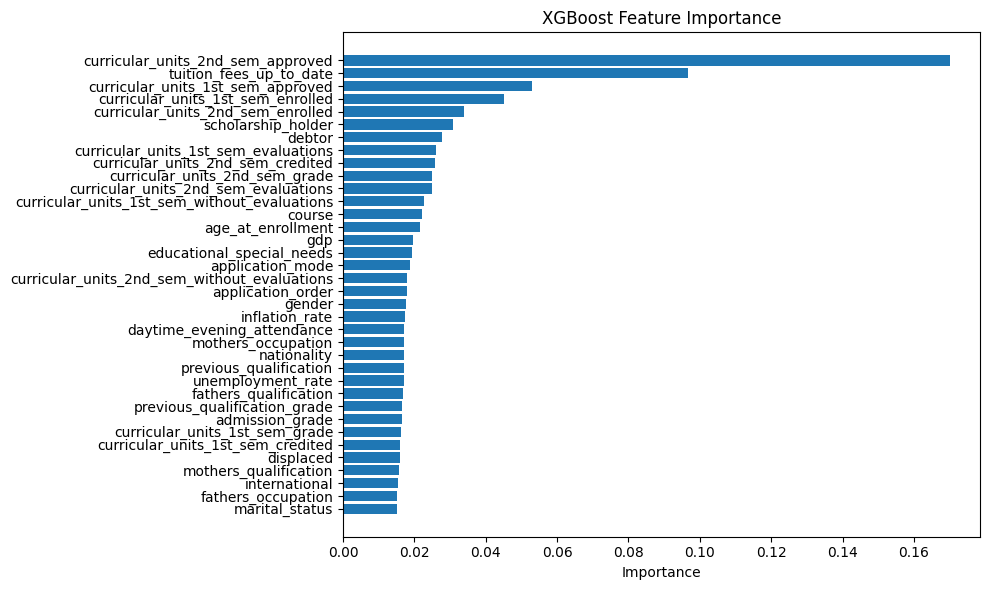

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#  Klassen-Mapping
class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print("Klassen-Mapping:", class_mapping)


xgb_model = XGBClassifier(
    n_estimators=200,           
    max_depth=6,                
    learning_rate=0.1,          
    subsample=0.8,              
    colsample_bytree=0.8,        
    objective='multi:softprob',  
    num_class=len(label_encoder.classes_),  
    random_state=42,          
    eval_metric='mlogloss'      
)


xgb_model.fit(X_train, y_train_encoded)
xgb_predictions_encoded = xgb_model.predict(X_test)
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)


print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))

# Feature-Importance visualisieren
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(xgb_model.feature_importances_)
plt.barh(range(len(sorted_idx)), xgb_model.feature_importances_[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

[I 2025-02-28 20:55:06,648] A new study created in memory with name: no-name-809622e3-c62b-42a5-a6da-1b66a80bddf7
[I 2025-02-28 20:55:08,769] Trial 0 finished with value: 0.7021513864349951 and parameters: {'n_estimators': 285, 'max_depth': 7, 'learning_rate': 0.2937638261831862, 'subsample': 0.7571161686468538, 'colsample_bytree': 0.8046637170674473, 'min_child_weight': 1, 'gamma': 0.5316769846426195}. Best is trial 0 with value: 0.7021513864349951.
[I 2025-02-28 20:55:10,213] Trial 1 finished with value: 0.6934669531395349 and parameters: {'n_estimators': 312, 'max_depth': 6, 'learning_rate': 0.28360228907249857, 'subsample': 0.8932834511960248, 'colsample_bytree': 0.9437316923107665, 'min_child_weight': 2, 'gamma': 4.877325839304383}. Best is trial 0 with value: 0.7021513864349951.
[I 2025-02-28 20:55:13,388] Trial 2 finished with value: 0.7063345493140741 and parameters: {'n_estimators': 201, 'max_depth': 9, 'learning_rate': 0.0666975867103524, 'subsample': 0.8176824786598381, 'col

Beste Parameter: {'n_estimators': 134, 'max_depth': 10, 'learning_rate': 0.0826841030854303, 'subsample': 0.7439277457182787, 'colsample_bytree': 0.9998541123918037, 'min_child_weight': 9, 'gamma': 1.636109817499524}
Beste kreuzvalidierte Genauigkeit: 0.7117912110876604
Genauigkeit auf Testdaten: 0.7649717514124293

Klassifikationsbericht:
               precision    recall  f1-score   support

     Dropout       0.83      0.75      0.79       316
    Enrolled       0.52      0.35      0.42       151
    Graduate       0.78      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.76      0.75       885

Konfusionsmatrix:
 [[237  30  49]
 [ 36  53  62]
 [ 13  18 387]]
F1-Makro: 0.6825997973642609


/var/folders/lz/_mnslz4x64340f6qccrnkq9r0000gn/T/ipykernel_1171/806819888.py:76: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 1000x600 with 0 Axes>

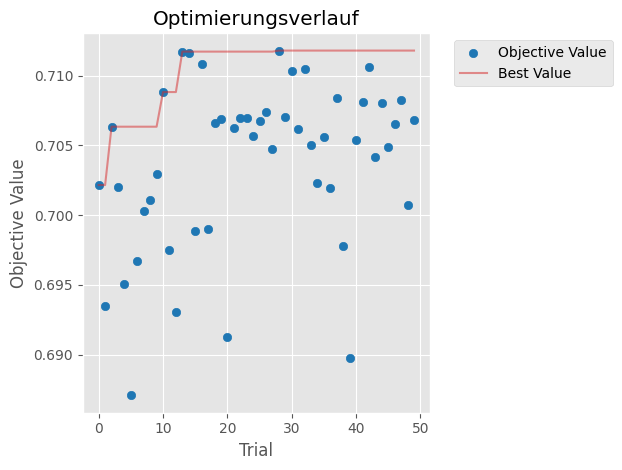

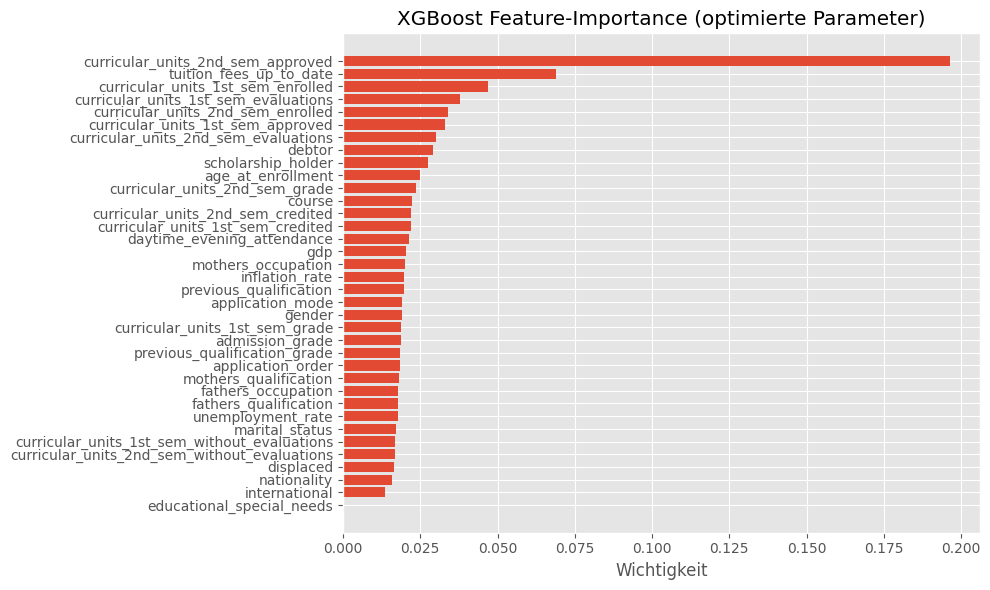

In [156]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Zielfunktion für Optuna
def objective(trial):
    # Parameter 
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'objective': 'multi:softprob',
        'num_class': len(label_encoder.classes_),
        'eval_metric': 'mlogloss',
        'random_state': 42
    }
    
    # Modell mit den aktuellen Parametern erstellen
    model = XGBClassifier(**param)
    
    # Kreuzvalidierung 
    cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='f1_macro')
    
    # Durchschnittliche Genauigkeit zurückgeben
    return np.mean(cv_scores)

# Optuna-Studie 
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Anzahl der Versuche 

# Beste Parameter a
print("Beste Parameter:", study.best_params)
print("Beste kreuzvalidierte Genauigkeit:", study.best_value)

# Optimales Modell mit den besten Parametern erstellen
best_params = study.best_params
best_params['objective'] = 'multi:softprob'
best_params['num_class'] = len(label_encoder.classes_)
best_params['eval_metric'] = 'mlogloss'
best_params['random_state'] = 42

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train_encoded)

# Modell auf Testdaten auswerten
y_test_encoded = label_encoder.transform(y_test)
test_predictions_encoded = best_model.predict(X_test)
test_predictions = label_encoder.inverse_transform(test_predictions_encoded)

# Endergebnisse ausgeben
from sklearn.metrics import classification_report, confusion_matrix

print("Genauigkeit auf Testdaten:", accuracy_score(y_test, test_predictions))
print("\nKlassifikationsbericht:\n", classification_report(y_test, test_predictions))
print("Konfusionsmatrix:\n", confusion_matrix(y_test, test_predictions))

f1_macro_score = f1_score(y_test, predictions, average='macro')
print("F1-Makro:", f1_macro_score)

# Visualisierung der Optimierungsergebnisse
import matplotlib.pyplot as plt

# Optimierungsverlauf
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_optimization_history(study)
plt.title('Optimierungsverlauf')
plt.tight_layout()
plt.show()

# Feature-Wichtigkeit des finalen Modells
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(best_model.feature_importances_)
plt.barh(range(len(sorted_idx)), best_model.feature_importances_[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('XGBoost Feature-Importance (optimierte Parameter)')
plt.xlabel('Wichtigkeit')
plt.tight_layout()
plt.show()

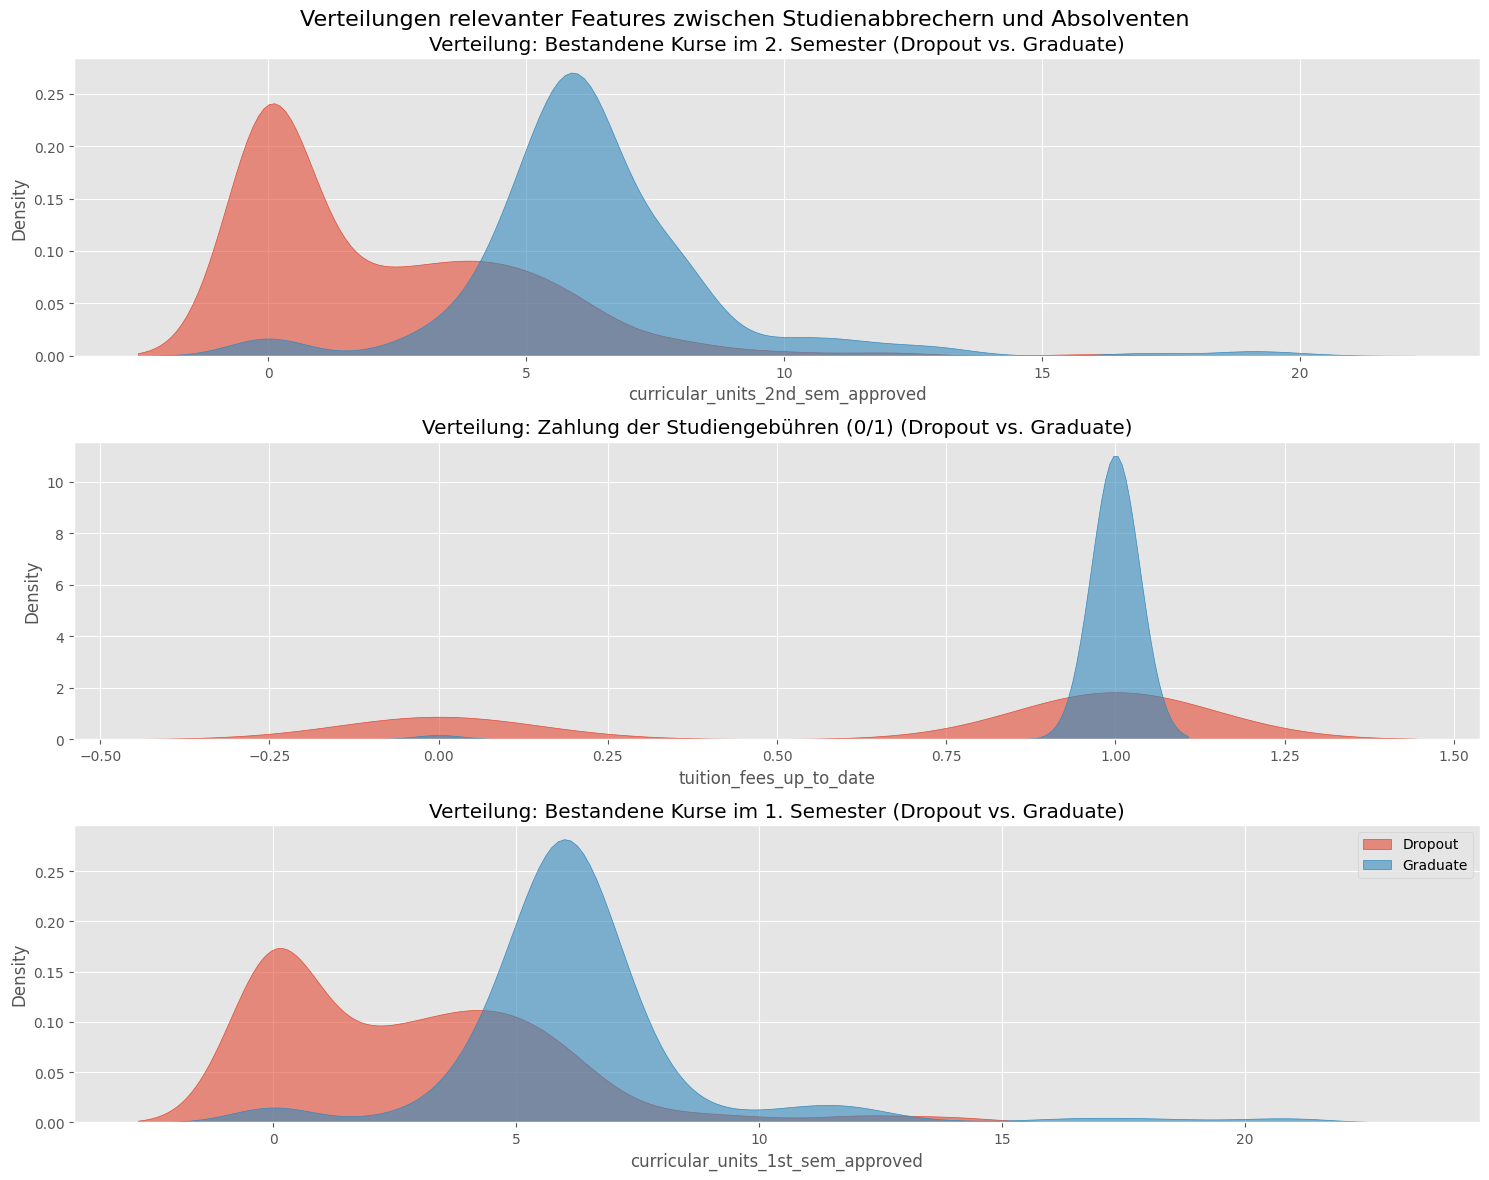

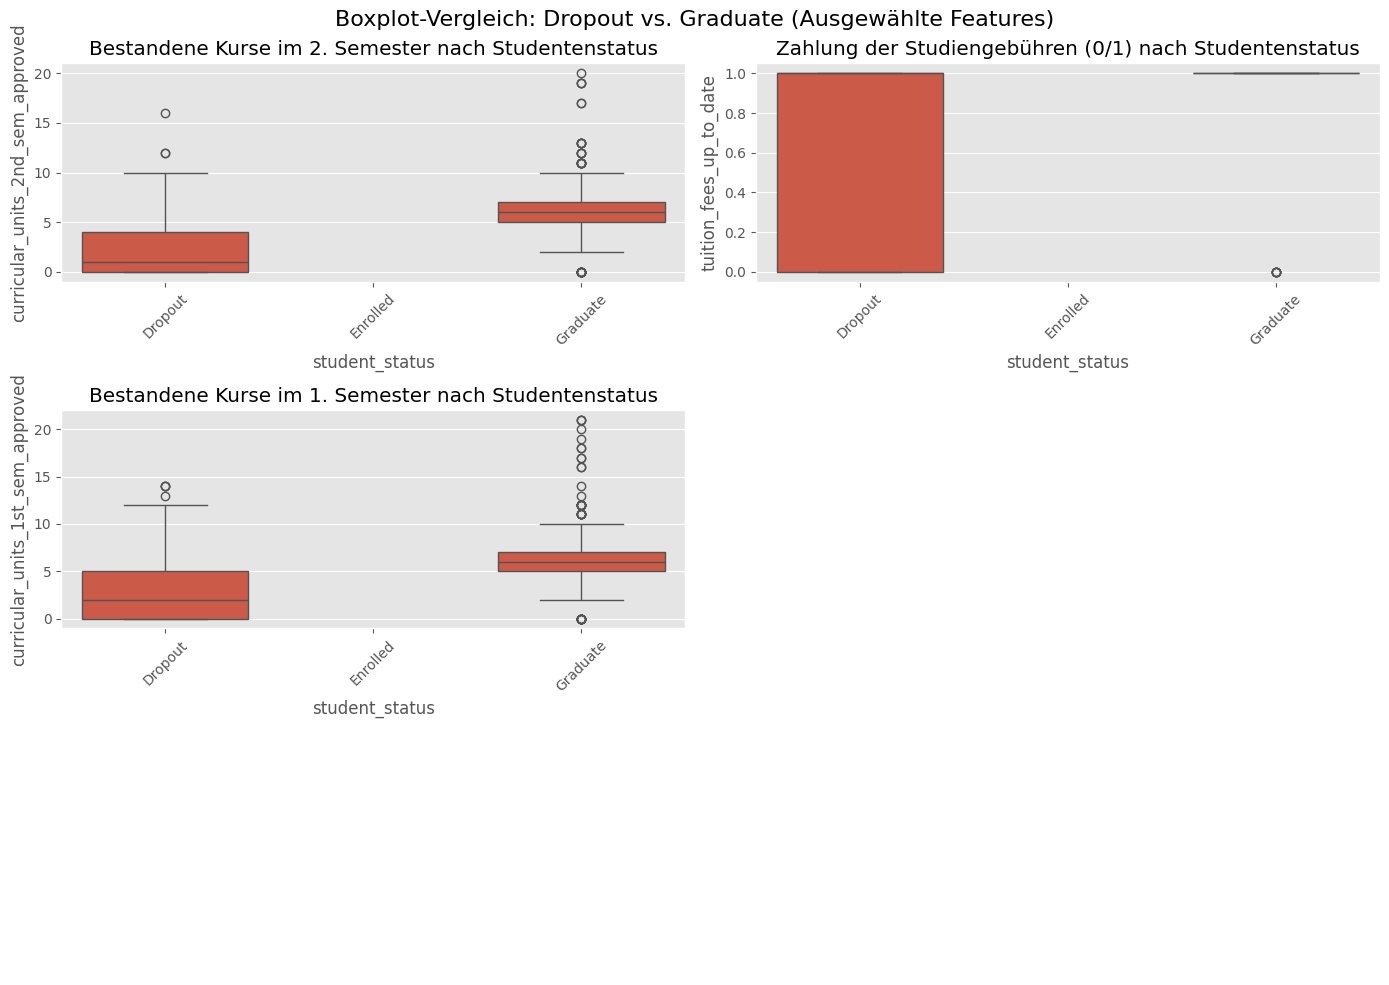

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_viz = X_test.copy()
df_viz['student_status'] = y_test

# Mapping der Spaltennamen 
feature_names_map = {
    'curricular_units_2nd_sem_approved': "Bestandene Kurse im 2. Semester",
    'tuition_fees_up_to_date': "Zahlung der Studiengebühren (0/1)",
    'curricular_units_1st_sem_approved': "Bestandene Kurse im 1. Semester"
}

top_features = list(feature_names_map.keys())

# ---------------------------------------------------
# 1. KDE-Plots (Verteilungen) nach Studentenstatus
# ---------------------------------------------------
plt.figure(figsize=(15, 12))

for i, feature in enumerate(top_features, 1):
    plt.subplot(len(top_features), 1, i)
    
    # Den sprechenden Namen ermitteln
    display_name = feature_names_map[feature]
    
    for status in ['Dropout', 'Graduate']:
        subset = df_viz[df_viz['student_status'] == status]
        sns.kdeplot(data=subset, x=feature, fill=True, common_norm=False, alpha=0.6, label=status)
    
    plt.title(f"Verteilung: {display_name} (Dropout vs. Graduate)")

plt.suptitle("Verteilungen relevanter Features zwischen Studienabbrechern und Absolventen", 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.legend()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------
# 2. Boxplots (Feature-Vergleich Dropout vs. Graduate)
# ---------------------------------------------------
plt.figure(figsize=(14, 10))

for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i+1)
    
    display_name = feature_names_map[feature]
    
    sns.boxplot(
        x='student_status', 
        y=feature, 
        data=df_viz[df_viz['student_status'].isin(['Dropout', 'Graduate'])]
    )
    plt.title(f"{display_name} nach Studentenstatus")
    plt.xticks(rotation=45)

# Leere Subplots
if len(top_features) < 6:
    for j in range(i+2, 7):
        plt.subplot(3, 2, j)
        plt.axis('off')

plt.suptitle("Boxplot-Vergleich: Dropout vs. Graduate (Ausgewählte Features)", fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('boxplot_top_features.png', dpi=300, bbox_inches='tight')
plt.show()


1. KDE-Plot:
Dropouts haben weniger bestandene Kurse.
Graduierte verteilen sich eher in Richtung 5-15 bestandene Kurse
Dropouts tendieren dazu, Studiengebühre nicht zu zahlen. Graduierte sind nahezu alle bei 1. Rechtzeitige Bezahlung der Studiengebühren eng mit Studienerfolg korreliert.
Dropouts haben tendenziell weniger belegte Kurse im 1. Semester. Graduates oft mehr 
Anzahl der durchgeführten Prüfungen/Bewertungen im 1. Semester liegt bei Graduates im Mittel höher als bei Dropouts.
Absolventen bestehen schon im 1. Semester meist deutlich mehr Kurse als Abbrecher.

Bereits im ersten Semester zeichnet sich oft ein Muster ab: Wer wenig Kurse besteht und ggf. Gebühren nicht zahlt, hat ein höheres Abbruchrisiko. Im zweiten Semester verfestigt sich dieser Trend.

2. Pairplot der Top‐Features
Die selben Features im Scatterplot:
Die blauen Punkte (Graduates) häufen sich in den Regionen mit höheren Werten.
Ein erfolgreicher Start ins Studium scheint stark mit einem Abschluss zu korrelieren    

3. Korrelationsmatrizen
Hier werden Dropouts und Graduates seperat betrachtet. Ähnliche BEobachtungen.

4. Boxplots
Graduates haben tendenziell höhere Mediane, mit teils größerer Streuung nach oben .

Fazit:
- Frühe Semester sind entscheident: Anzahl bestandener Kurse im ersten Semester
- Gebührenstatus als Warnsignal
- Hochschulen könnten frühzeitig Studierende identifizieren, die im 1. Semester deutlich weniger Kurse bestehen oder mit den Gebühren in Verzug sind,  um gezielte Unterstützung anzubieten. 

